# Cats and dogs (with augmentation and dropout)

In [1]:
import os, shutil
import zipfile

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from keras.preprocessing import image

Using TensorFlow backend.


### Define folders

In [2]:
original_dataset_dir = './cats_and_dogs_org/'
base_dir = './cats_and_dogs_small/'

### Download data from kaggle

In [3]:
#!pip install kaggle

In [4]:
if not os.path.exists(original_dataset_dir):
    #for the following step it is necessary having a token: https://github.com/Kaggle/kaggle-api
    os.system("kaggle competitions download -c dogs-vs-cats -p" + original_dataset_dir)
    print("Data downloaded from kaggle")
    
    with zipfile.ZipFile(original_dataset_dir+'/test1.zip',"r") as zip_ref:
        zip_ref.extractall(original_dataset_dir)
    print("test unzipped")
    
    with zipfile.ZipFile(original_dataset_dir+'/train.zip',"r") as zip_ref:
        zip_ref.extractall(original_dataset_dir)
    print("train unzipped")

### Create folders for train, validaton and test and move files

In [5]:
if not os.path.exists(base_dir):
    
    # Create folders
    
    os.mkdir(base_dir)

    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)


    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir) #Directory with training cat pictures

    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir) #Directory with training dog pictures

    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir) # Directory with validation cat pictures

    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir) #Directory with validation dog pictures

    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir) #Directory with test cat pictures

    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir) #Directory with test dog pictures
    
    
    # Move files
    
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

        
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
        
else:
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')
    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    test_cats_dir = os.path.join(test_dir, 'cats')
    test_dogs_dir = os.path.join(test_dir, 'dogs')    
        


### Print summary  

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Augmentation (example)

In [7]:
# list of all files in train cats
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [9]:
# chose image n.2
img_path = fnames[3]

In [10]:
img = image.load_img(img_path, target_size=(150, 150))

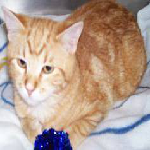

In [11]:
img

In [12]:
x = image.img_to_array(img)
x.shape

(150, 150, 3)

In [13]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

In [14]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

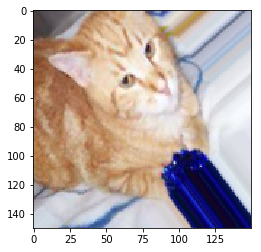

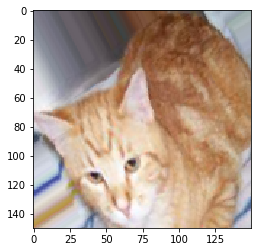

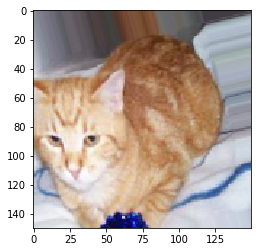

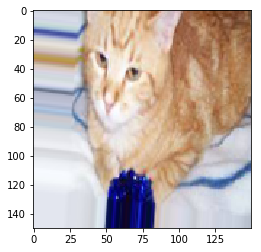

In [15]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Build network

In [16]:
def get_model(): 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    # Important to add this dropout for augmentation!
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [17]:
model = get_model()

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Compile

In [19]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Data preprocessing
(create data generators)

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Small extract as example

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


# Fit

In [23]:
%%time

#11m for 30 epochs

#Note: steps_per_epoch=100 so 2000/32=62 where 20 is the dimension of the batch and 2000 is the total train images
#NOT valid anymore because noe there are many more figures, not just 2000!!!!

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=validation_generator, validation_steps=50)


Epoch 1/10
100/100 [==============================] - 45s 448ms/step - loss: 0.6901 - acc: 0.5237 - val_loss: 0.6688 - val_acc: 0.6022
Epoch 2/10
100/100 [==============================] - 43s 427ms/step - loss: 0.6762 - acc: 0.5691 - val_loss: 0.6444 - val_acc: 0.6117
Epoch 3/10
100/100 [==============================] - 46s 456ms/step - loss: 0.6698 - acc: 0.5822 - val_loss: 0.6416 - val_acc: 0.6269
Epoch 4/10
100/100 [==============================] - 47s 469ms/step - loss: 0.6535 - acc: 0.6050 - val_loss: 0.6315 - val_acc: 0.6320
Epoch 5/10
100/100 [==============================] - 44s 436ms/step - loss: 0.6465 - acc: 0.6200 - val_loss: 0.6057 - val_acc: 0.6459
Epoch 6/10
100/100 [==============================] - 48s 480ms/step - loss: 0.6243 - acc: 0.6431 - val_loss: 0.6779 - val_acc: 0.6041
Epoch 7/10
100/100 [==============================] - 48s 476ms/step - loss: 0.6179 - acc: 0.6513 - val_loss: 0.5890 - val_acc: 0.6694
Epoch 8/10
100/100 [==============================] - 5

# Save model

In [24]:
model.save(base_dir+'/cats_and_dogs_small_1.h5')

# Plots

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

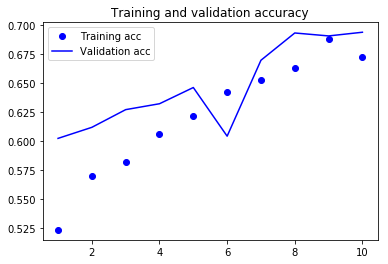

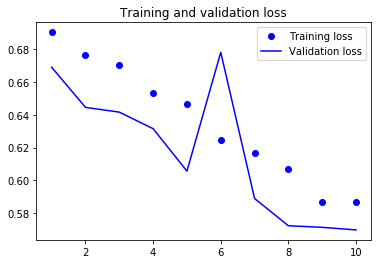

In [26]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()